In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.genetic_utils.initialization import generate_distance_matrix
from src.heuristics.genetic_algorithm import GeneticAlgorithm
from src.heuristics.greedy_search import GreedySearch
from src.heuristics.random_search import RandomSearch

In [2]:
def plot_genetic(log_history):
    xs = np.arange(len(log_history))
    
    plt.plot(xs, log_history["best"], label="Best fitness")
    plt.plot(xs, log_history["mean"], label="Mean fitness")
    plt.plot(xs, log_history["worst"], label="Worst fitness")

    plt.title("Fitness progression plot")
    plt.legend()

In [7]:
N = 200
TOUR = 100
POP_SIZE = 500
ITERS = 1000

distance_matrix = generate_distance_matrix(N)

In [14]:
random_search = RandomSearch(N, ITERS)
random_search.run(distance_matrix)

np.min(random_search.history["fitness"])

Iteration 2984:  60%|█████▉    | 2983/5000 [00:01<00:01, 1814.62it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
greedy_search = GreedySearch(N)
greedy_search.run(distance_matrix)

np.min(greedy_search.history["fitness"])

Iteration 1: 100%|██████████| 1/1 [00:00<00:00, 229.74it/s]


0.011049602649568977

Iteration 5000: 100%|██████████| 5000/5000 [00:23<00:00, 208.62it/s]


0.0002245441807495399


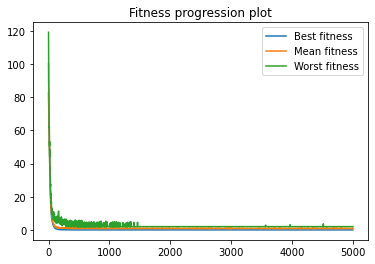

In [13]:
ga = GeneticAlgorithm(POP_SIZE, N, TOUR, ITERS)
ga.run(distance_matrix)

print(np.min(ga.history["best"]))
plot_genetic(ga.history)